In [97]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import networkx as nx

# 1 Analyzing the Wikipedia voters network [27 points]
Download the Wikipedia voting network wiki-Vote.txt.gz: http://snap.stanford.edu/data/wiki-Vote.html. 

Using one of the network analysis tools above, load the Wikipedia voting network. Note that Wikipedia is a directed network. Formally, we consider the Wikipedia network as a directed graph G = (V, E), with node set V and edge set E ⊂ V × V where (edges are ordered pairs of nodes). An edge (a, b) ∈ E means that user a voted on user b.  
To make our questions clearer, we will use the following small graph as a running example:  
> G_small = (V_small , E_small),  
> where V_small = {1, 2, 3} and E_small = {(1, 2), (2, 1), (1, 3), (1, 1)}.  

Compute and print out the following statistics for the wiki-Vote network:

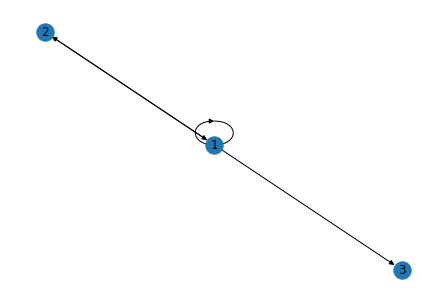

In [98]:
#G-small:
Gsmall = nx.DiGraph()
Gsmall.add_edges_from([(1,2), (2,1), (1,3), (1,1)])
Asmall = nx.to_numpy_matrix(Gsmall)

nx.draw(Gsmall, with_labels=True)
plt.show()

In [99]:
G = nx.read_edgelist('data/wiki-Vote.txt', comments='#', delimiter='\t', create_using=nx.DiGraph)
A = nx.to_numpy_matrix(G)

### The number of nodes in the network. (G_small has 3 nodes.)

In [100]:
a = Gsmall.number_of_nodes()
b = G.number_of_nodes()

print(f'G_small number of nodes: {a} \n'
      f'G number of nodes: {b}')

G_small number of nodes: 3 
G number of nodes: 7115


### The number of nodes with a self-edge (self-loop), i.e., the number of nodes a ∈ V where (a, a) ∈ E. (G small has 1 self-edge.)

In [101]:
a1 = nx.number_of_selfloops(Gsmall)
a2 = np.diagonal(Asmall).sum()
a3 = np.trace(Asmall)
b1 = nx.number_of_selfloops(G)
b2 = np.diagonal(A).sum()
b3 = np.trace(A)

print('G_small number of selfloops:', a1,a2,a3, '(calculated in 3 ways)',
      '\nG number of selfloops:', b1,b2,b3, '(calculated in 3 ways)'
     )

G_small number of selfloops: 1 1.0 1.0 (calculated in 3 ways) 
G number of selfloops: 0 0.0 0.0 (calculated in 3 ways)


### The number of directed edges in the network, i.e., the number of ordered pairs (a, b) ∈ E for which a a ≠ b. (G small has 3 directed edges.)

In [102]:
a1 = Gsmall.number_of_edges() -  nx.number_of_selfloops(Gsmall)
a2 = Asmall.sum() - np.trace(Asmall)
b1 = G.number_of_edges() -  nx.number_of_selfloops(G)
b2 = A.sum() - np.trace(A)

print('G_small number of directed edges:', a1,a2, '(calculated in 2 ways)',
      '\nG number of directed edges:', b1,b2, '(calculated in 2 ways)'
     )

G_small number of directed edges: 3 3.0 (calculated in 2 ways) 
G number of directed edges: 103689 103689.0 (calculated in 2 ways)


### The number of undirected edges in the network, i.e., the number of unique unordered pairs (a, b), a a ≠ b, for which (a, b) ∈ E or (b, a) ∈ E (or both). If both (a, b) and (b, a) are edges, this counts a single undirected edge. (G small has 2 undirected edges.)

In [103]:
a1 = Gsmall.to_undirected().size()  - nx.number_of_selfloops(Gsmall)
b1 = G.to_undirected().size()  - nx.number_of_selfloops(G)

print('G_small number of undirected edges:', a1,
      '\nG number of undirected edges:', b1
     )

G_small number of undirected edges: 2 
G number of undirected edges: 100762


### The number of reciprocated edges in the network, i.e., the number of unique unordered pairs of nodes (a, b), a a ≠ b, for which (a, b) ∈ E and (b, a) ∈ E. (G small has 1 reciprocated edge.)

In [104]:
def cnt_reciprocated_edges(G):

    reciprocated_edges = 0

    for (u, v) in G.edges():
        if (v, u) in G.edges():
            reciprocated_edges += 1

    return (reciprocated_edges - nx.number_of_selfloops(G)) / 2

a1 = cnt_reciprocated_edges(Gsmall)
a2 = Gsmall.to_undirected(reciprocal=True).size() - nx.number_of_selfloops(Gsmall)
b1 = cnt_reciprocated_edges(G)
b2 = G.to_undirected(reciprocal=True).size() -  - nx.number_of_selfloops(G)

print('G_small number of reciprocated edges:', a1, a2, '(calculated in 2 ways)'
      '\nG number of reciprocated edges:', b1, b2, '(calculated in 2 ways)'
     )

G_small number of reciprocated edges: 1.0 1 (calculated in 2 ways)
G number of reciprocated edges: 2927.0 2927 (calculated in 2 ways)


### The number of nodes of zero out-degree. (G small has 1 node with zero out-degree.)

In [105]:
def cnt_zero_out_degree_nodes(G):
    
    A = nx.to_numpy_matrix(G)
    zero_out_degree_nodes = 0
    size_A = A.shape[0]

    for i in range(size_A):
        if A[i].sum() == 0:
            zero_out_degree_nodes += 1

    return zero_out_degree_nodes

a1 = cnt_zero_out_degree_nodes(Gsmall)
b1 = cnt_zero_out_degree_nodes(G)

print('G_small number of zero out-degree nodes:', a1,
      '\nG number of zero out-degree nodes:', b1
     )


G_small number of zero out-degree nodes: 1 
G number of zero out-degree nodes: 1005


### The number of nodes of zero in-degree. (G small has 0 nodes with zero in-degree.)

In [106]:
def cnt_zero_in_degree_nodes(G):

    A = nx.to_numpy_matrix(G)
    zero_in_degree_nodes = 0
    size_A = A.shape[0]

    for i in range(size_A):
        if A[:,i].sum() == 0:
            zero_in_degree_nodes += 1

    return zero_in_degree_nodes

a1 = cnt_zero_in_degree_nodes(Gsmall)
b1 = cnt_zero_in_degree_nodes(G)

print('G_small number of zero in-degree nodes:', a1,
      '\nG number of zero in-degree nodes:', b1
     )

G_small number of zero in-degree nodes: 0 
G number of zero in-degree nodes: 4734


### The number of nodes with more than 10 outgoing edges (out-degree > 10).

In [107]:
def cnt_more_10_degree_nodes(G):

    A = nx.to_numpy_matrix(G)
    more_10_degree_nodes = 0
    size_A = A.shape[0]

    for i in range(size_A):
        if A[i].sum() > 10:
            more_10_degree_nodes += 1

    return more_10_degree_nodes

a1 = cnt_more_10_degree_nodes(Gsmall)
b1 = cnt_more_10_degree_nodes(G)

print('G_small number of nodes with more than 10 outgoing edges:', a1,
      '\nG number of nodes with more than 10 outgoing edges:', b1
     )

G_small number of nodes with more than 10 outgoing edges: 0 
G number of nodes with more than 10 outgoing edges: 1612


### The number of nodes with fewer than 10 incoming edges (in-degree < 10).

In [108]:
def cnt_fewer_10_degree_nodes(G):
    
    A = nx.to_numpy_matrix(G)
    fewer_10_degree_nodes = 0
    size_A = A.shape[0]

    for i in range(size_A):
        if A[:,i].sum() < 10:
            fewer_10_degree_nodes += 1

    return fewer_10_degree_nodes

a1 = cnt_fewer_10_degree_nodes(Gsmall)
b1 = cnt_fewer_10_degree_nodes(G)

print('G_small number of nodes with fewer than 10 outgoing edges:', a1,
      '\nG number of nodes with fewer than 10 outgoing edges:', b1
     )

G_small number of nodes with fewer than 10 outgoing edges: 3 
G number of nodes with fewer than 10 outgoing edges: 5165


# 2 Further Analyzing the Wikipedia voters network [33 points]

For this problem, we use the Wikipedia voters network. If you are using Python, you might want to use NumPy, SciPy, and/or Matplotlib libraries.

### (18 points) Plot the distribution of out-degrees of nodes in the network on a log-log scale. Each data point is a pair (x, y) where x is a positive integer and y is the number of nodes in the network with out-degree equal to x. Restrict the range of x between the minimum and maximum out-degrees. You may filter out data points with a 0 entry. For the log-log scale, use base 10 for both x and y axes.

In [109]:
out_degrees = []

size_A = A.shape[0]

for i in range(size_A):
    out_degrees.append(A[i].sum())

min_out_degrees = min(out_degrees) 
max_out_degrees = max(out_degrees)


d = {}

for i in range(size_A):
    a = A[i].sum()
    if a not in d:
        d[a] = 1
    else:
        d[a] += 1

del d[0]
min_out_degrees = min(d.keys())
max_out_degrees = max(d.keys())
print('Minimal out degree:',min_out_degrees, 
      '\nMaximum out degree:',max_out_degrees)

Minimal out degree: 1.0 
Maximum out degree: 893.0


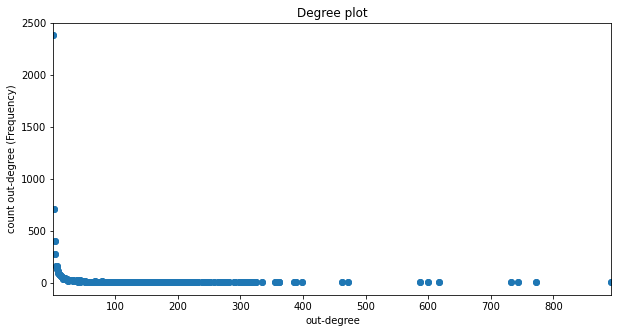

In [110]:
values = list(d.keys())
count = list(d.values())

plt.figure(figsize=(10, 5))
plt.plot(values, count, 'o')
plt.scatter(values, count)
plt.xlim([(min_out_degrees), (max_out_degrees)])
plt.title('Degree plot')
plt.xlabel('out-degree')
plt.ylabel('count out-degree (Frequency)')
plt.show()

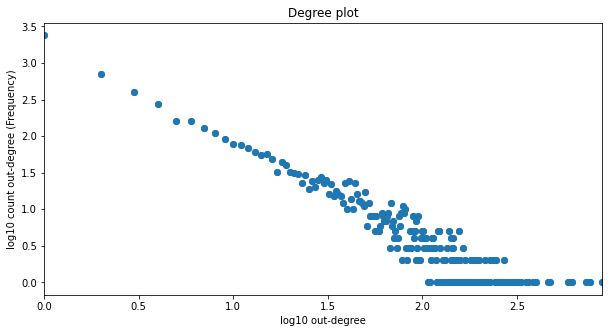

In [111]:
plt.figure(figsize=(10, 5))
plt.plot(np.log10(values), np.log10(count), 'o')
plt.scatter(np.log10(values), np.log10(count))
plt.xlim([np.log10(min_out_degrees), np.log10(max_out_degrees)])
plt.title('Degree plot')
plt.xlabel('log10 out-degree')
plt.ylabel('log10 count out-degree (Frequency)')
plt.show()

### (15 points) Compute and plot the least-square regression line for the out-degree distribution in the log-log scale plot. Note we want to find coefficients a and b such that the function log 10 y = a · log 10 x + b, equivalently, y = 10 b · x a , best fits the out-degree distribution. What are the coefficients a and b? For this part, you might want to use the method called polyfit in NumPy with deg parameter equal to 1.

In [112]:
from numpy.polynomial import Polynomial

x = np.log10(values)
y = np.log10(count)

regression = Polynomial.fit(x, y, deg=1)
regression

Polynomial([ 1.24233888, -1.89011583], domain=[0.        , 2.95085146], window=[-1.,  1.])

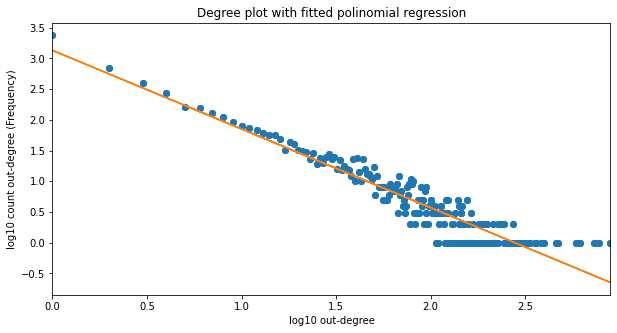

In [113]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o')
predicts = regression(x)
plt.plot(x, predicts)
plt.scatter(x, y)
plt.xlim([np.log10(min_out_degrees), np.log10(max_out_degrees)])
plt.title('Degree plot with fitted polinomial regression')
plt.xlabel('log10 out-degree')
plt.ylabel('log10 count out-degree (Frequency)')
plt.show()

# 3 Finding Experts on the Java Programming Language on StackOverflow [40 points]

Download the StackOverflow network stackoverflow-Java.txt.gz: http://snap.stanford.edu/class/cs224w-data/hw0/stackoverflow-Java.txt.gz. An edge (a, b) in the network means that person a endorsed an answer from person b on a Java-related question. Using one of the network analysis tools above, load the StackOverflow network. Note that StackOverflow is a directed network. Compute and print out the following statistics for the stackoverflow-Java network:

In [114]:
G = nx.read_edgelist('data/stackoverflow-Java.txt', comments='#', delimiter='\t', create_using=nx.DiGraph)

### The number of weakly connected components in the network. This value can be calculated in Snap.py via function GetWccs.

In [115]:
a = len(list(nx.weakly_connected_components(G)))
print('Number of weakly connected components:', a)

Number of weakly connected components: 10143


### The number of edges and the number of nodes in the largest weakly connected component. The largest weakly connected component is calculated in Snap.py with function GetMxWcc.

In [116]:
#smallest_cc = min(nx.weakly_connected_components(G), key=len)
largest_cc = max(nx.weakly_connected_components(G), key=len)
print('Number of nodes in the largest WCC:', len(largest_cc))
H = G.subgraph(largest_cc)
print('Number of edges in the largest WCC:', H.number_of_edges())

Number of nodes in the largest WCC: 131188
Number of edges in the largest WCC: 322486


### IDs of the top 3 most central nodes in the network by PagePank scores. PageRank scores are calculated in Snap.py with function GetPageRank.

In [117]:
pr = nx.pagerank(G)

print('IDs of the top 3 most central nodes by PageRank scores:', sorted(pr, key=pr.get, reverse=True)[:3])

IDs of the top 3 most central nodes by PageRank scores: ['992484', '22656', '139985']


### IDs of the top 3 hubs and top 3 authorities in the network by HITS scores.

In [118]:
h = nx.hits(G)
hubs = h[0]
authorities = h[1]

print('IDs of the top 3 hubs by HITS scores:', sorted(hubs, key=hubs.get, reverse=True)[:3])
print('IDs of the top 3 authorities by HITS scores:', sorted(authorities, key=authorities.get, reverse=True)[:3])

/Users/avshoyko/.pyenv/versions/3.10.3/envs/graph-ipynb/lib/python3.10/site-packages/networkx/algorithms/link_analysis/hits_alg.py:78: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G), dtype=float)


IDs of the top 3 hubs by HITS scores: ['892029', '1194415', '359862']
IDs of the top 3 authorities by HITS scores: ['22656', '157882', '571407']
